<a href="https://colab.research.google.com/github/dha3sh/Hand-Written-Digit-Detection-With-CNN/blob/main/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

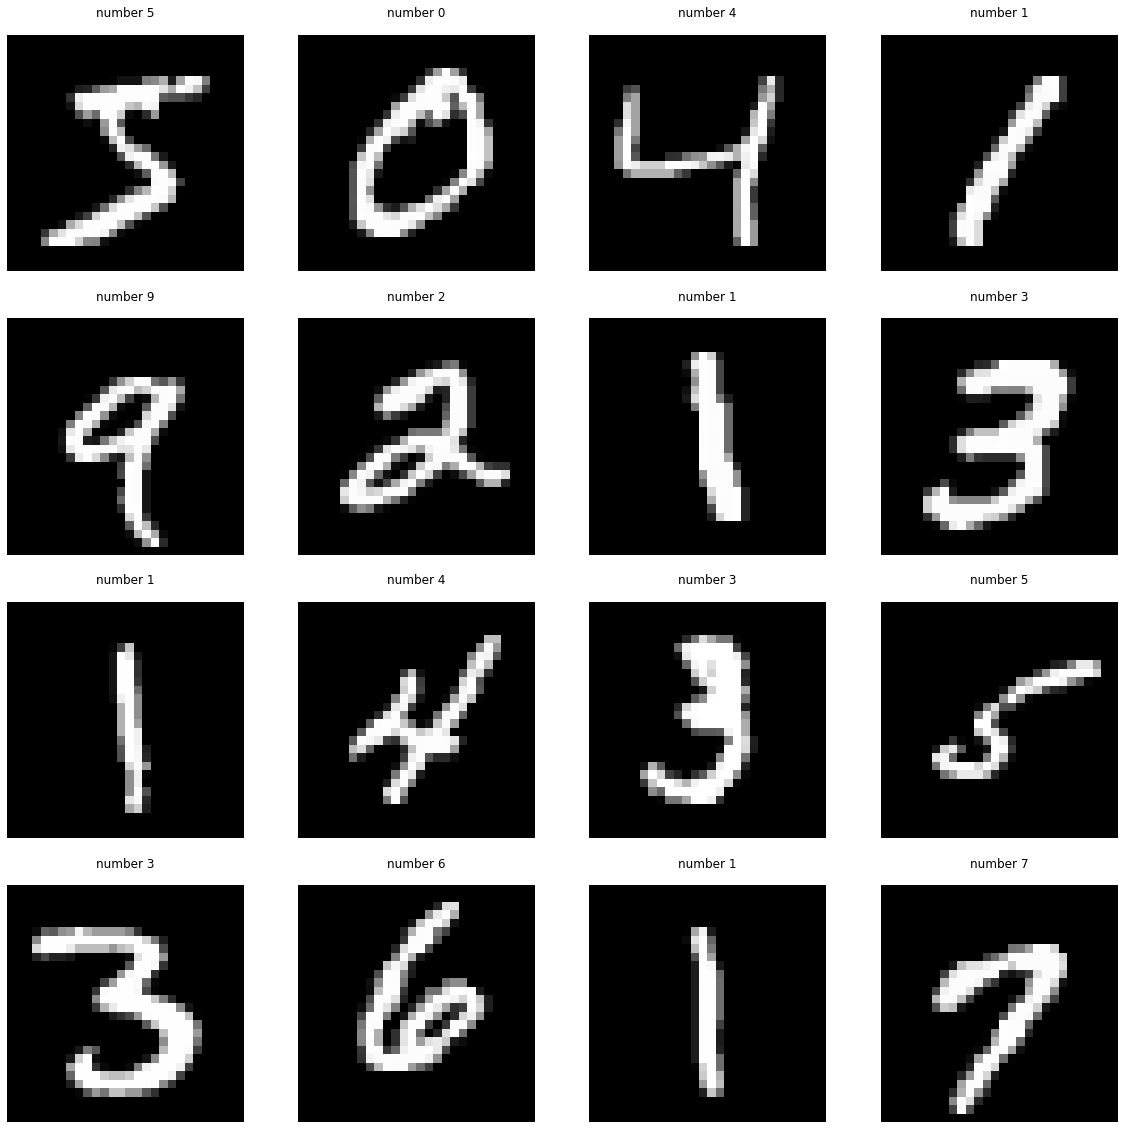

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(4, 4, figsize = (20,20))
plt.gray()
for i, ax in enumerate(axes.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('number {}'.format(y_train[i]))
  fig.show()

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 225
x_test /= 225
print('x_train_shape: ', x_train.shape)

print('no of image in x train', x_train.shape[0])

print('no of image in x test', x_test.shape[0])

x_train_shape:  (60000, 28, 28, 1)
no of image in x train 60000
no of image in x test 10000


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

In [9]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1960 - accuracy: 0.9421
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0803 - accuracy: 0.9756
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0543 - accuracy: 0.9822


In [11]:
pred = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0522 - accuracy: 0.9831
